# **Басманов Родион Геннадьевич Б81-мм**

Лабораторная работа 4.

# Кубический эрмитов сплайн

## Постановка задачи

Пусть в узлах сетки $a = x_0 < x_1 < \ldots < x_n = b$ заданы значения функции $f_i = f(x_i)$ и её производной $f'_i = f'(x_i)$, $i = 0, 1, \ldots, N$.

## Определение сплайна

На промежутке $[x_i, x_{i+1}]$ будем строить кубический интерполяционный сплайн:

$$S(x) = a_{i0} + a_{i1}(x-x_i) + a_{i2}(x-x_i)^2 + a_{i3}(x-x_i)^3, \quad x \in [x_i, x_{i+1}] \tag{1}$$

так что 
$$S(x_i) = f_i, \quad S'(x_i) = f'_i \tag{2}$$

т.е. $S \in C^1[a, b]$.

## Система уравнений

Из условий интерполяции (2) получаем систему уравнений:

$$\begin{cases}
S(x_i) = f_i \\
S(x_{i+1}) = f_{i+1} \\
S'(x_i) = f'_i \\
S'(x_{i+1}) = f'_{i+1}
\end{cases}$$

## Базисная формула

Решив систему, имеем:

$$S(x) = \varphi_1(t)f_i + \varphi_2(t)f_{i+1} + \varphi_3(t)h_i f'_i + \varphi_4(t)h_i f'_{i+1} \tag{3}$$

где базисные функции Эрмита определяются как:

$$\begin{align}
\varphi_1(t) &= (1-t)^2(1+2t) \\
\varphi_2(t) &= t^2(3-2t) \\
\varphi_3(t) &= t(1-t)^2 \\
\varphi_4(t) &= -t^2(1-t)
\end{align}$$

$$h_i = x_{i+1} - x_i, \quad t = \frac{x - x_i}{h_i}$$

## Расчётная формула

Формула (3) удобна для теоретических вычислений. Преобразуем (3) и получаем расчётную формулу:

$$S(x) = f_i + (x - x_i)[f'_i + t(B + tA)], \quad x \in [x_i, x_{i+1})$$

где:

$$A = -\frac{2(f_{i+1} - f_i)}{h_i} + (f'_i + f'_{i+1})$$

$$B = -A + \frac{f_{i+1} - f_i}{h_i} - f'_i$$

$$h_i = x_{i+1} - x_i, \quad t = \frac{x - x_i}{h_i}$$

---

**Примечание:** Данная расчётная формула эффективна для программной реализации кубического эрмитова сплайна.


# Задача: Кубический эрмитов сплайн

## Постановка задачи

Построить кубический эрмитов сплайн по значениям функции 

$$f(x) = \frac{1}{1 + 25x^2}$$

в узлах равномерной сетки $\{x_i\}$ с шагом $h$:

$$x_i = -1 + ih, \quad i = 0, 1, \ldots, n-1, \quad n = 5$$

где $h = \frac{2}{n-1} = \frac{2}{4} = 0.5$.

## Исходные данные

- **Функция:** $f(x) = \frac{1}{1 + 25x^2}$ (функция Рунге)
- **Производная:** $f'(x) = -\frac{50x}{(1 + 25x^2)^2}$
- **Интервал:** $[-1, 1]$
- **Количество узлов:** $n = 5$
- **Узлы сетки:** $x_0 = -1, x_1 = -0.5, x_2 = 0, x_3 = 0.5, x_4 = 1$

## Требования к решению

1. **Построить сплайн** с использованием значений функции $f_i = f(x_i)$ и производных $f'_i = f'(x_i)$ в узлах
2. **Визуализировать результаты:** построить графики исходной функции и сплайна
3. **Провести анализ погрешности:** вычислить и построить график абсолютной ошибки

---

# **Программная реализация**

Узлы интерполяции:
x_1 = -0.600, f = 0.100000, f' = 0.300000
x_2 = -0.200, f = 0.500000, f' = 2.500000
x_3 = 0.200, f = 0.500000, f' = -2.500000
x_4 = 0.600, f = 0.100000, f' = -0.300000
x_5 = 1.000, f = 0.038462, f' = -0.073964


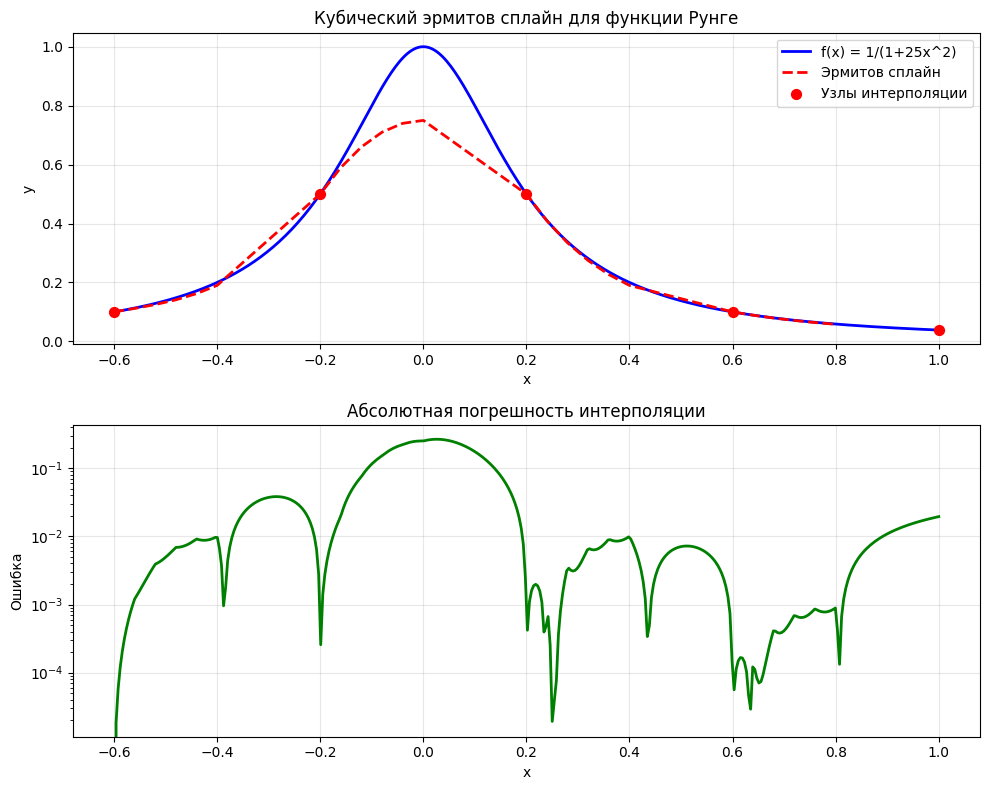


Максимальная абсолютная ошибка: 0.265880
Среднеквадратичная ошибка: 0.084295


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def runge_func(x):
    return 1/(1 + 25 * x ** 2)

def df_runge_func(x):
    return -(50 * x)/(1 + 25 * x ** 2) ** 2

n = 5
h = 0.4

x_nodes = []
F = []
F1 = []

for i in range(1, n + 1):
    x_i = -1 + i * h
    x_nodes.append(x_i)
    F.append(runge_func(x_i))
    F1.append(df_runge_func(x_i))

print("Узлы интерполяции:")
for i in range(len(x_nodes)):
    print(f"x_{i+1} = {x_nodes[i]:.3f}, f = {F[i]:.6f}, f' = {F1[i]:.6f}")

h1 = h / 10
xx = []
s = []

for i in range(n - 1):
    for j in range(0, 6):
        t = (j * h1) / h
        
        A = -2 * (F[i+1] - F[i])/h + F1[i] + F1[i+1]
        B = -A + (F[i+1] - F[i])/h - F1[i]
        
        xx_val = x_nodes[i] + j * h1
        
        s_val = F[i] + j * h1 * (F1[i] + t * (B + t * A))
        
        xx.append(xx_val)
        s.append(s_val)

xx = np.array(xx)
s = np.array(s)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

x_fine = np.linspace(-0.6, 1.0, 400)
y_exact = runge_func(x_fine)

ax1.plot(x_fine, y_exact, 'b-', label='f(x) = 1/(1+25x^2)', linewidth=2)
ax1.plot(xx, s, 'r--', label='Эрмитов сплайн', linewidth=2)
ax1.scatter(x_nodes, F, color='red', s=50, zorder=5, label='Узлы интерполяции')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Кубический эрмитов сплайн для функции Рунге')

s_interp = np.interp(x_fine, xx, s)
error = np.abs(y_exact - s_interp)

ax2.semilogy(x_fine, error, 'g-', linewidth=2)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x')
ax2.set_ylabel('Ошибка')
ax2.set_title('Абсолютная погрешность интерполяции')

plt.tight_layout()
plt.show()

print(f"\nМаксимальная абсолютная ошибка: {np.max(error):.6f}")
print(f"Среднеквадратичная ошибка: {np.sqrt(np.mean(error**2)):.6f}")
